In [4]:
import pandas as pd
# from tqdm import tqdm
# from transformers import pipeline
# from datasets import Dataset
import matplotlib.pyplot as plt
from src import sentiment_analyzer

# Analysis section

## Reddit

In [5]:
emotion_data_df = pd.read_csv('data/reddit_emotions_final.csv')

Plot saved to plots/reddit_emotions_distribution_final.png


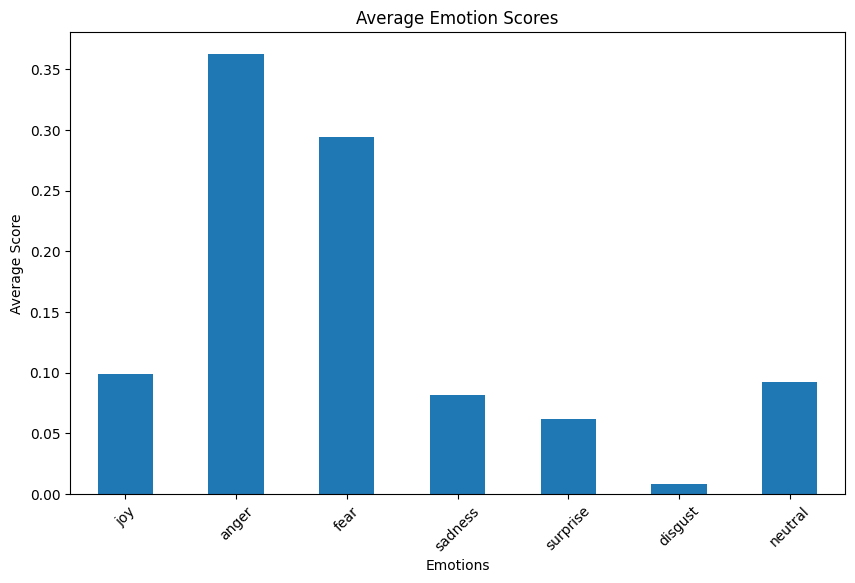

In [5]:
sentiment_analyzer.plot_emotions(emotion_data_df, 
                                  save_path='plots/reddit_emotions_distribution_final.png')

Plot saved to plots/reddit_daily_trends_final.png


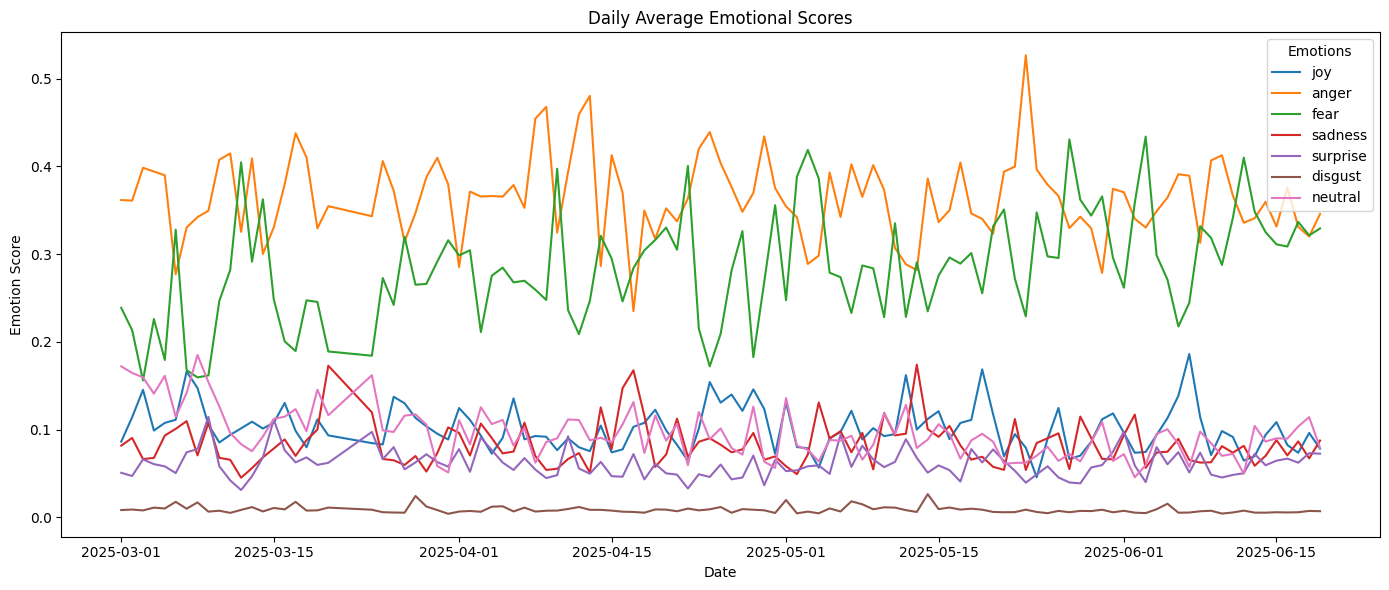

In [6]:
sentiment_analyzer.plot_emotion_trends(
    data=emotion_data_df,
    time_column='created_time',
    emotion_columns=['joy', 'anger', 'fear', 'sadness', 'surprise', 'disgust', 'neutral'],
    save_path='plots/reddit_daily_trends_final.png'
)

Plot saved to plots/reddit_3_rolling_trends_final.png


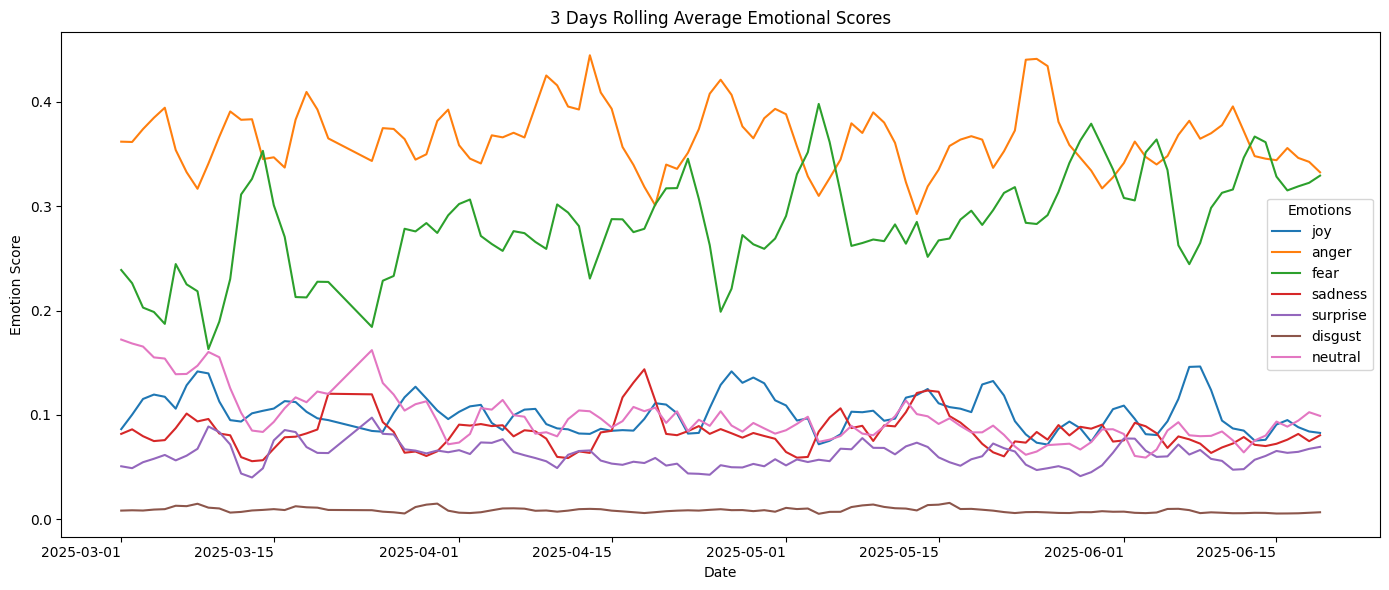

In [7]:
window_size = 3
sentiment_analyzer.plot_emotion_trends(
    data=emotion_data_df,
    time_column='created_time',
    emotion_columns=['joy', 'anger', 'fear', 'sadness', 'surprise', 'disgust', 'neutral'],
    rolling_average=True,
    window_size=window_size,
    save_path=f'plots/reddit_{window_size}_rolling_trends_final.png'
)

## ACLED

In [7]:
acled_df = pd.read_csv('data/ACLED_filtered.csv')
acled_df.head(1)

,event_date,event_type,sub_event_type,actor1,civilian_targeting,location,source,notes,fatalities,population_best,event_category
0,2025-06-20,Explosions/Remote violence,Shelling/artillery/missile attack,Hamas Movement,No,Qizan an Najjar,Quds News Network,"On 20 June 2025, Hamas militants targeted Isra...",0,4453.0,Combat


In [19]:
acled_df.shape

(11371, 11)

In [17]:
joy_events = acled_df[acled_df['notes'].str.contains("ceasefire|peace|agreement|hostage", case=False, na=False)]

In [28]:
joy_events.loc[1521, ]['notes']

'Other: On 6 June 2025, the body of a Thai-Israeli hostage was recovered from Rafah area, coded to generic location of Rafah (Rafah, Gaza Strip) after he was abducted and killed by Mujahideen Brigades on 7 October 2023.'

In [9]:
acled_df['event_type'].unique(), acled_df['event_type'].value_counts()
acled_df['civilian_targeting'].unique(), acled_df['civilian_targeting'].value_counts()

(array(['No', 'Yes'], dtype=object),
 civilian_targeting
 Yes    5992
 No     5379
 Name: count, dtype: int64)

In [6]:
emotion_data_df['event_date'] = pd.to_datetime(emotion_data_df['created_time']).dt.date
emotion_data_df.set_index('event_date', inplace=True)
emotion_data_df

,comment_id,post_id,clean_text,created_time,post_created_time,joy,neutral,surprise,sadness,anger,fear,disgust
event_date,,,,,,,,,,,,
2025-06-19,myq2fju,1lfm6w2,gaza humanitarian foundation deliver meal brin...,2025-06-19 23:58:57,2025-06-19 21:11:30,0.659603,0.163814,0.132972,0.019058,0.016796,0.006303,0.001455
2025-06-19,myq2exu,1lfbo3y,israel vow intensify attack iranian missile hi...,2025-06-19 23:58:51,2025-06-19 14:05:52,0.005457,0.002076,0.002145,0.012493,0.919986,0.056974,0.000868
2025-06-19,myq2emk,1lfa4vh,israeli general quit sky interview catch lie w...,2025-06-19 23:58:48,2025-06-19 12:56:26,0.003128,0.002361,0.001925,0.001752,0.018621,0.971650,0.000562
2025-06-19,myq2d99,1lfoz8y,israeli scientist reel iranian missile strike ...,2025-06-19 23:58:35,2025-06-19 23:14:40,0.043305,0.062387,0.215580,0.473228,0.100084,0.103951,0.001464
2025-06-19,myq2b0u,1lfhvhd,netanyahu stun israelis describe personal cost...,2025-06-19 23:58:13,2025-06-19 18:14:49,0.027278,0.032887,0.112906,0.511858,0.238415,0.075819,0.000835
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,mff6efl,1j0yafc,proukraine propalestine protestor london suppo...,2025-03-01 12:29:42,2025-03-01 12:22:06,0.021216,0.016685,0.006320,0.010200,0.908545,0.035764,0.001271
2025-03-01,mff61fu,1j0xma0,article israeli penal code specifically hear a...,2025-03-01 12:26:50,2025-03-01 11:38:59,0.003407,0.002555,0.001147,0.001979,0.938871,0.050798,0.001243
2025-03-01,mff5xct,1j0xma0,article israeli penal code specifically hear a...,2025-03-01 12:25:54,2025-03-01 11:38:59,0.003407,0.002555,0.001147,0.001979,0.938871,0.050798,0.001243


In [7]:
# add the number of events per day, count the number of events or comments per day
# this will be useful to see if there is a correlation between the number of events and the emotions expressed in the comments
# we can use the 'event_date' column to group by date
emotion_per_day = emotion_data_df.groupby('event_date').agg({
    'joy': 'mean',
    'anger': 'mean',
    'fear': 'mean',
    'sadness': 'mean',
    'surprise': 'mean',
    'disgust': 'mean',
    'neutral': 'mean',
    'comment_id': 'count'
}).rename(columns={'comment_id': 'comments_count'}).reset_index().set_index('event_date')

In [8]:
acled_df['event_date'] = pd.to_datetime(acled_df['event_date']).dt.date
acled_df.set_index('event_date', inplace=True)

In [13]:
# Optional: total number of events or fatalities per day
events_per_day = acled_df.groupby(acled_df.index).agg(
    fatalities = ('fatalities', 'sum'),
    event_count = ('event_type', 'count'),
    civilian_harm = ('civilian_targeting', lambda x: (x == 'Yes').sum())  # Count civilian-targeted events
).rename(columns={'event_type': 'event_count'})


In [15]:
events_per_day.head()

,fatalities,event_count,civilian_harm
event_date,,,
2025-03-01,0,58,24
2025-03-02,14,75,34
2025-03-03,6,55,30
2025-03-04,14,58,30
2025-03-05,4,57,22


In [16]:
combined_df = emotion_per_day.merge(events_per_day, 
                                    left_index=True, 
                                    right_index=True, 
                                    how='left')  # 'left' to keep all Reddit days


In [18]:
emotion_data_df.head(1)

,comment_id,post_id,clean_text,created_time,post_created_time,joy,neutral,surprise,sadness,anger,fear,disgust
event_date,,,,,,,,,,,,
2025-06-19,myq2fju,1lfm6w2,gaza humanitarian foundation deliver meal brin...,2025-06-19 23:58:57,2025-06-19 21:11:30,0.659603,0.163814,0.132972,0.019058,0.016796,0.006303,0.001455


In [ ]:
# Compare emotions by ACLED event type
event_emotions = acled_df.merge(
    emotion_data_df, 
    left_index=True, 
    right_index=True, 
    how='left'
).groupby('event_type')[['anger', 'fear']].mean()

print(event_emotions.sort_values('anger', ascending=False))

STARTING COMPREHENSIVE EMOTION-CONFLICT ANALYSIS
Preparing data...
Data prepared: 108 days analyzed

EXPLORATORY ANALYSIS
Basic Statistics:
Date range: 2025-03-01 00:00:00 to 2025-06-19 00:00:00
Total comments: 417,567
Total events: 10,994
Total fatalities: 11,678

Average Emotion Scores:
  Joy: 0.102
  Anger: 0.364
  Fear: 0.285
  Sadness: 0.083
  Surprise: 0.061
  Disgust: 0.009
  Neutral: 0.096

High-Activity Days:
Days with ≥250 fatalities: 5
Top 4 deadliest days:
  2025-03-18: 810.0 fatalities, 123.0 events
  2025-04-03: 298.0 fatalities, 116.0 events
  2025-05-15: 286.0 fatalities, 146.0 events
  2025-05-18: 262.0 fatalities, 137.0 events

 CORRELATION ANALYSIS
Same-day correlations (Emotions vs Fatalities):
  Sadness: 0.093 
  Anger: 0.087 
  Fear: 0.048 
  Surprise: -0.021 
  Joy: -0.070 
  Disgust: -0.139 *
  Neutral: -0.234 **

Lagged correlations (Emotions vs Previous Day's Fatalities):
  Fear: 0.117 *
  Sadness: 0.065 
  Surprise: -0.005 
  Joy: -0.046 
  Disgust: -0.094 
 

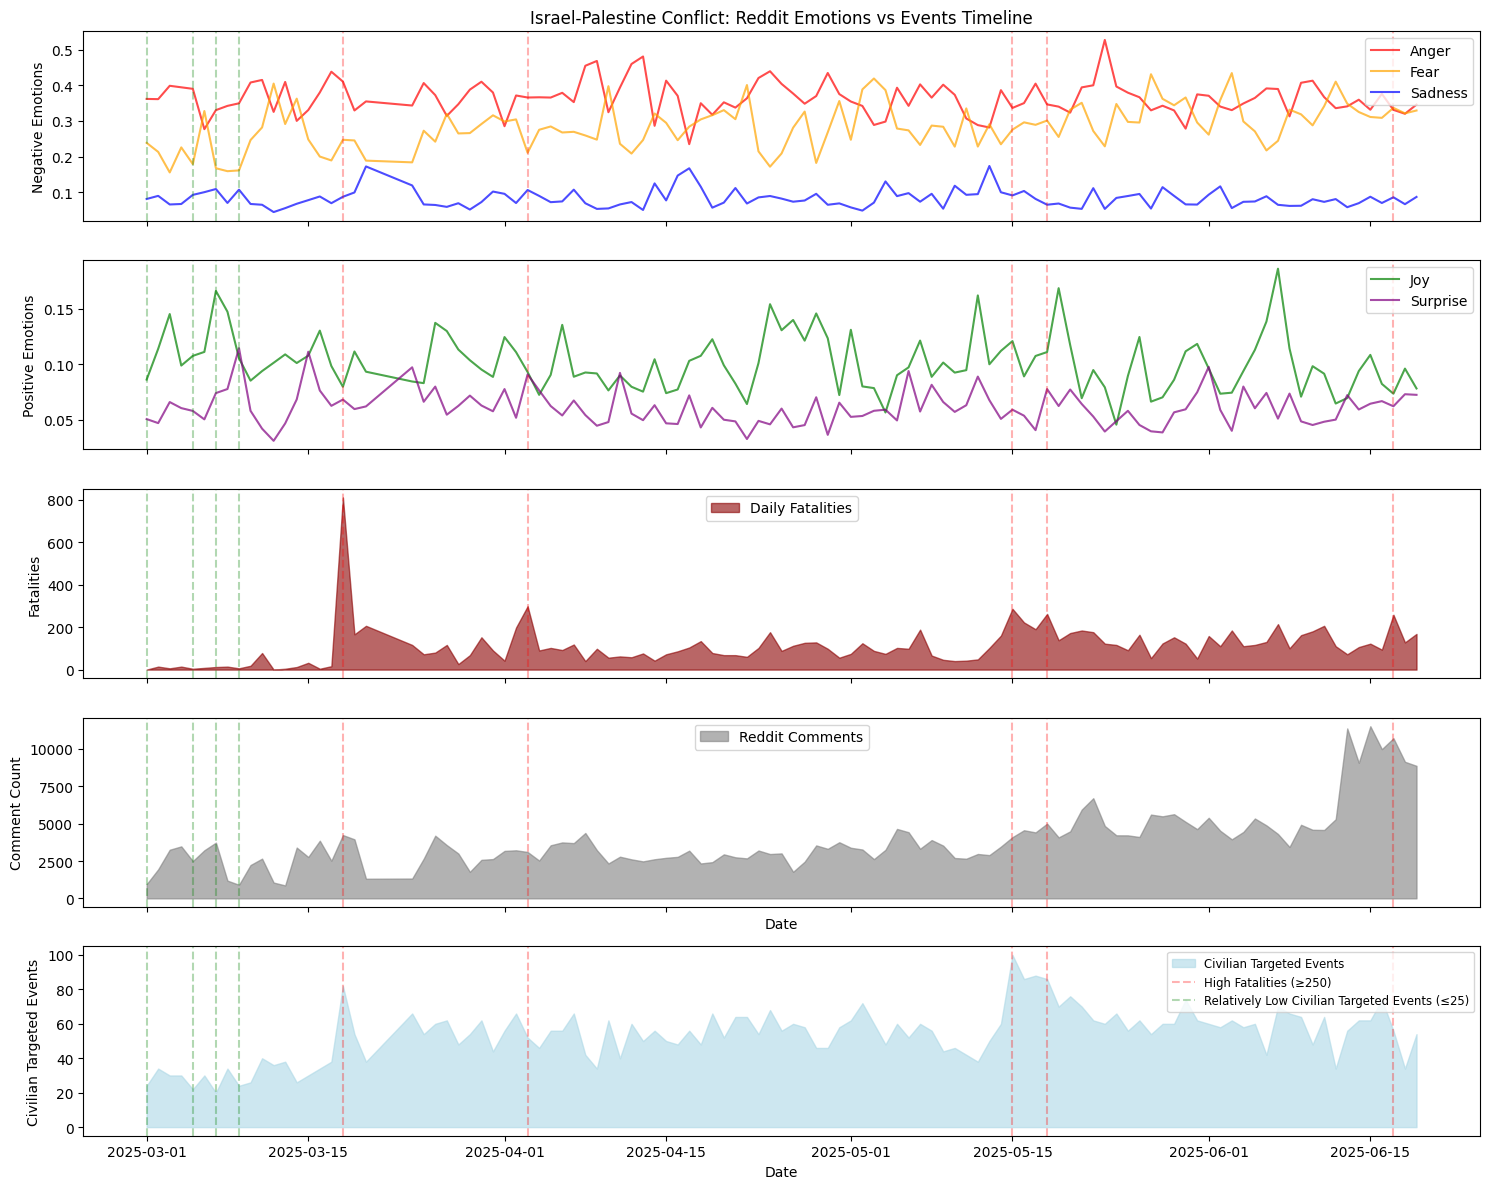

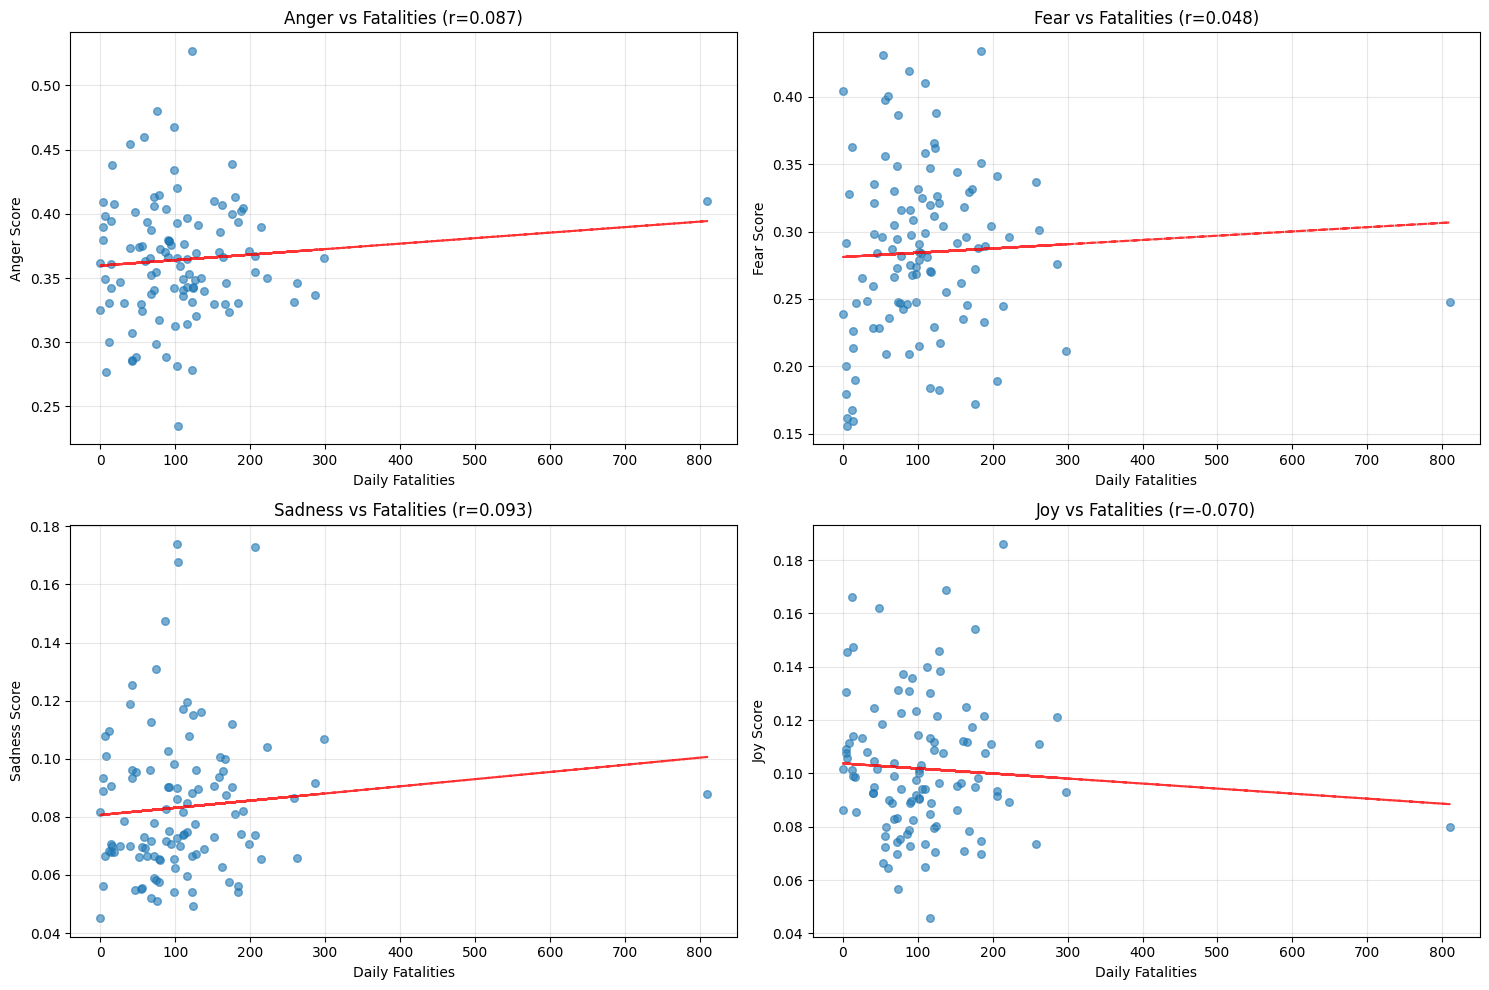

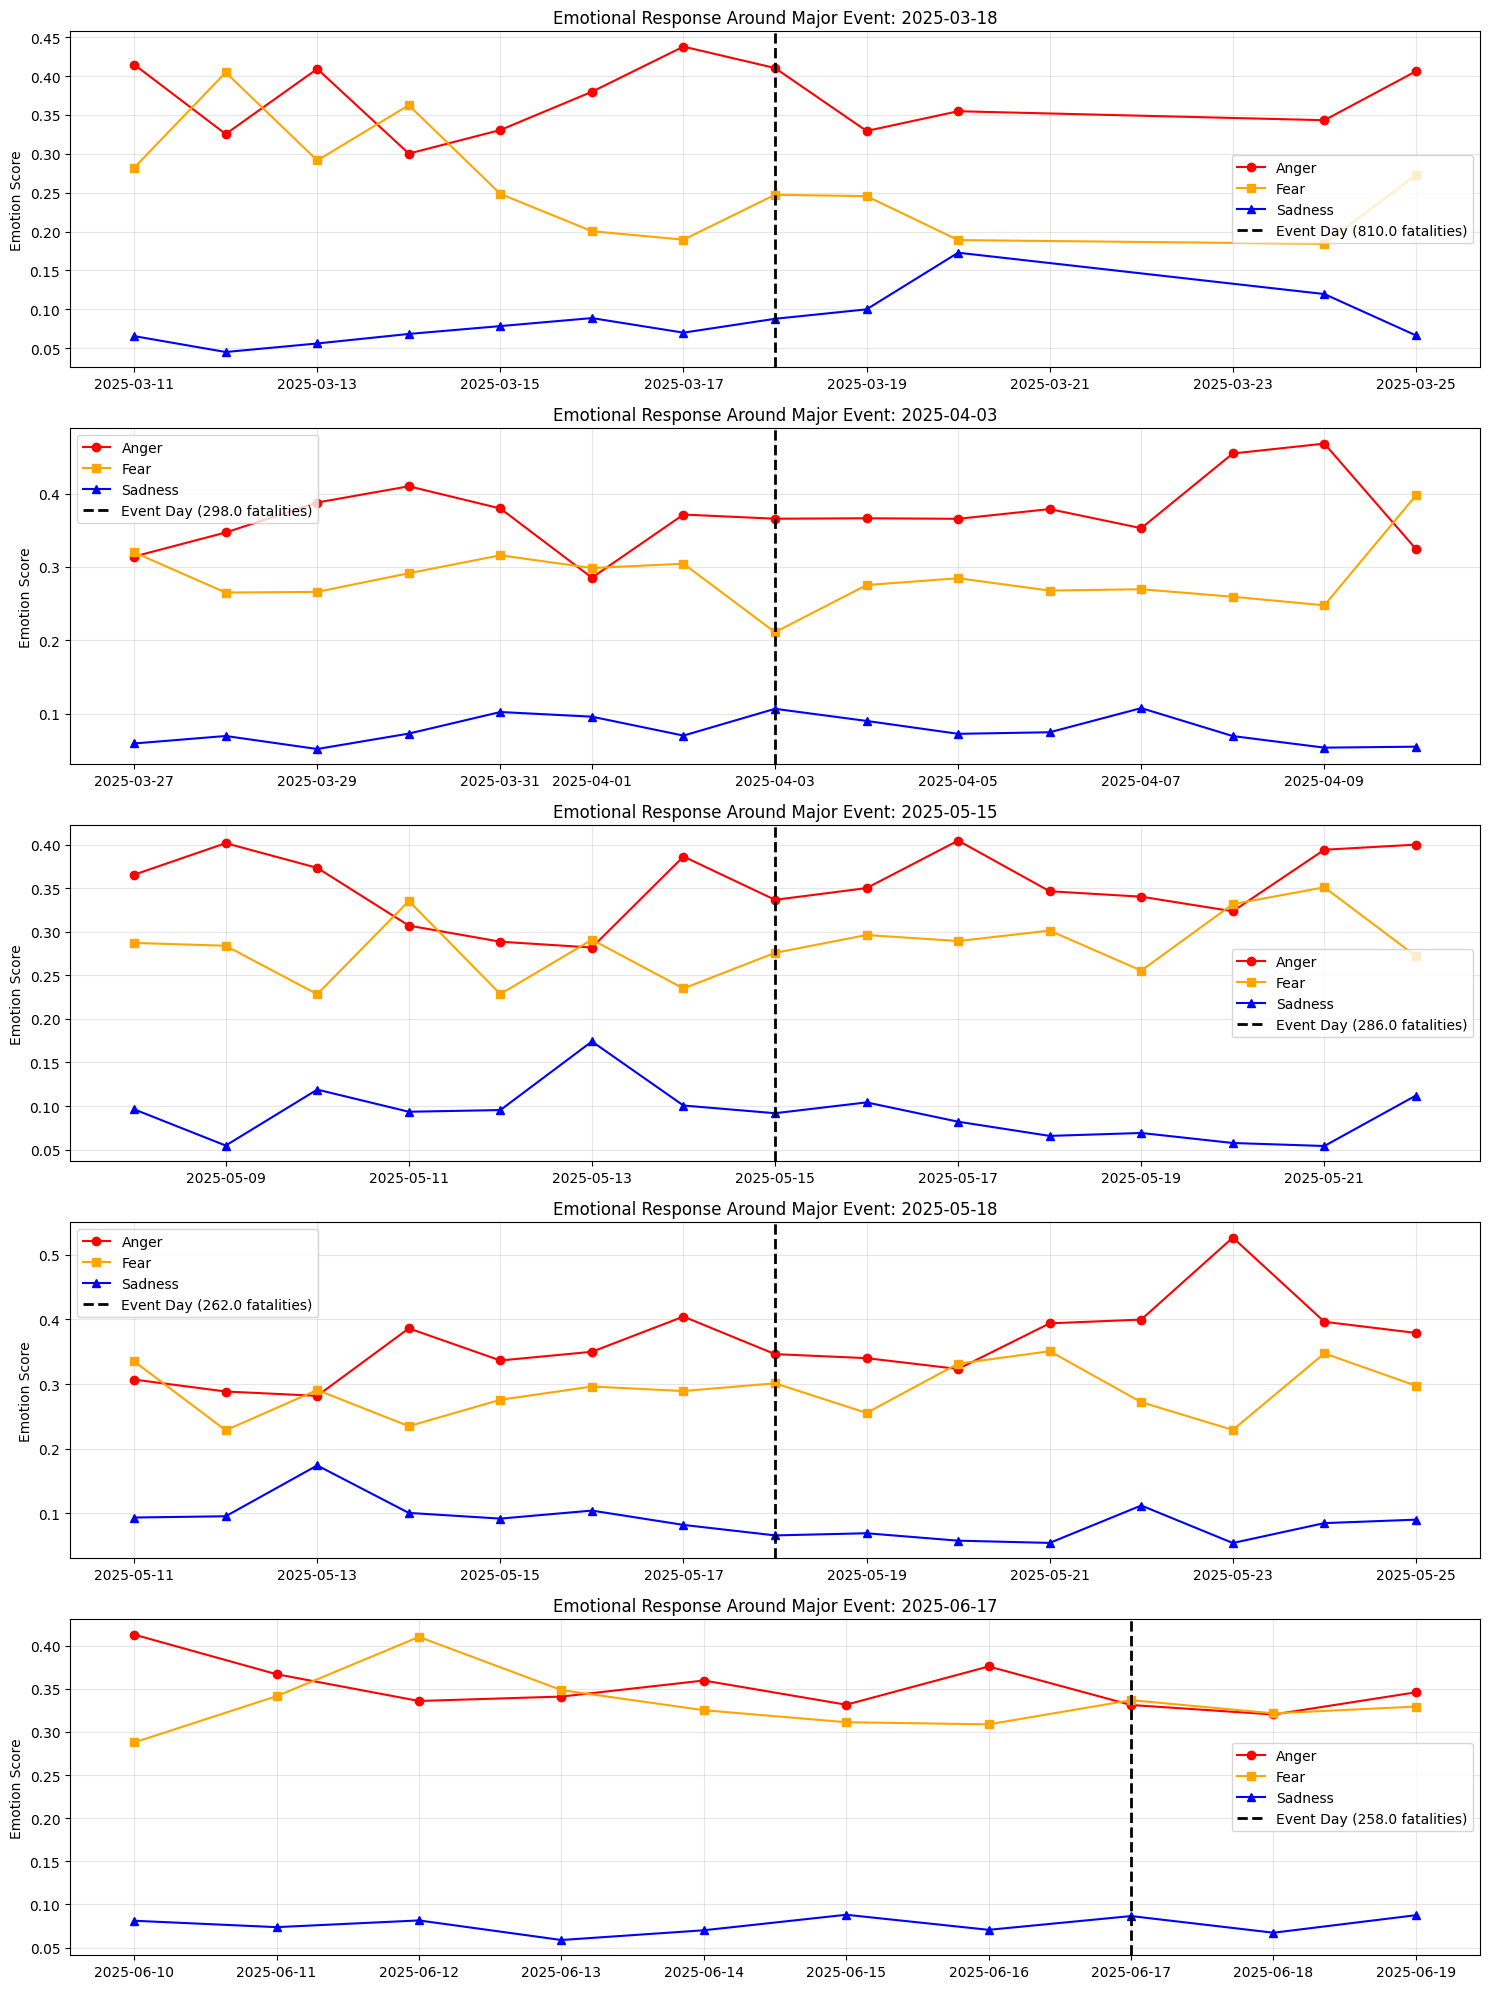

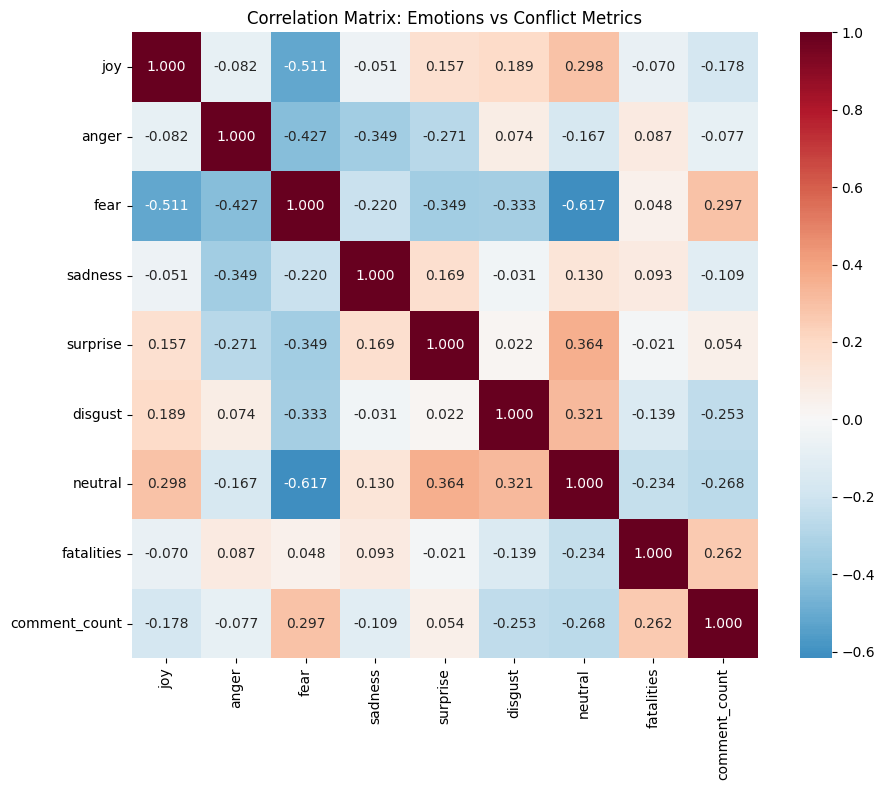


KEY INSIGHTS
1. **Neutral** shows the strongest correlation with fatalities (r=-0.234)
2. **Fear** shows the largest weekend vs weekday difference
3. **Fear** is most associated with comment volume
4. **Neutral** might be most predictive of next-day violence

ANALYSIS COMPLETE!
Check the 'plots' directory for visualizations.


In [1]:
# In your main.ipynb - replace your existing analysis with this:
from src.combined_analysis import run_complete_analysis

# Run the complete structured analysis
analyzer = run_complete_analysis()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler = MinMaxScaler()
# scaled = scaler.fit_transform(combined_df[['joy', 'anger', 'fear', 'sadness', 'surprise', 'disgust', 'neutral', 'event_count', 'fatalities', 'comments_count']])
# combined_df['joy_scaled'],  combined_df['anger_scaled'], combined_df['fear_scaled'], combined_df['sadness_scaled'], \
#     combined_df['surprise_scaled'], combined_df['disgust_scaled'], combined_df['neutral_scaled'], combined_df['event_scaled'], combined_df['fatalities_scaled'], combined_df['comments_scaled'] = scaled.T

# import matplotlib.pyplot as plt

# fig, ax1 = plt.subplots(figsize=(14, 6))

# # Plot emotion (e.g., fear)
# # ax1.plot(combined_df.index, combined_df['fear_scaled'], color='green', label='Fear')
# ax1.plot(combined_df.index, combined_df['sadness_scaled'], color='blue', label='Joy')
# ax1.set_ylabel('Normalized Joy (Mean Proportion)', color='blue')

# # Plot event count on secondary axis
# ax2 = ax1.twinx()
# ax2.plot(combined_df.index, combined_df['fatalities_scaled'], color='red', label='Conflict Events')
# ax2.set_ylabel('Normalized Fatalities', color='red')

# plt.title("Fear on Reddit vs Conflict Events in Gaza (Mar-Jun 2025)")
# fig.tight_layout()
# plt.show()

# combined_df.groupby('event_date')['anger'].mean().describe(), combined_df.groupby('event_date')['fear'].mean().describe()